<a href="https://colab.research.google.com/github/Mastermind305/TOMATO-LEAF-DISEASE-CLASSIFICATION-BY-DEEP-LEARNING/blob/main/tomato_ResNet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unrar x '/content/drive/MyDrive/tomato/train.rar'
!unrar x '/content/drive/MyDrive/tomato/val.rar'

Streaming output truncated to the last 5000 lines.
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1001f133-ff3e-48de-b288-5a3802d9f3e1___Com.G_SpM_FL 8621.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1030a8ae-d4f2-4a36-aac9-c5ca40e5ec03___Com.G_SpM_FL 9295.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/105833d3-690a-44fa-abd7-0a8c6245f7b0___Com.G_SpM_FL 1277.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/10742761-050e-4a3b-b3ef-cbbde8cd6d2a___Com.G_SpM_FL 8445.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1075cc73-3ea9-47c1-a92d-98cda4b222b7___Com.G_SpM_FL 9467.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/11337458-8442-4322-b615-31a57e7a8323___Com.G_SpM_FL 8840.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mi

In [5]:
import os
folder_path1 = '/content/train'
folder_path2 = '/content/val'
for dirname, _, filenames in os.walk(folder_path1):
    print(dirname)

/content/train
/content/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/train/Tomato___Early_blight
/content/train/Tomato___Target_Spot
/content/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/train/Tomato___Bacterial_spot
/content/train/Tomato___Tomato_mosaic_virus
/content/train/Tomato___Septoria_leaf_spot
/content/train/Tomato___healthy
/content/train/Tomato___Leaf_Mold
/content/train/Tomato___Late_blight


In [6]:
print('Total Bacterial images:', len(os.listdir
(folder_path1 + '/Tomato___Bacterial_spot')))
print('Total Early blight images:', len(os.listdir(folder_path1 + '/Tomato___Early_blight')))
print('Total Late blight images:', len(os.listdir(folder_path1 + '/Tomato___Late_blight')))
print('Total Leaf_mold images:', len(os.listdir(folder_path1 + '/Tomato___Leaf_Mold')))
print('Total Septoria leaf images:', len(os.listdir(folder_path1 + '/Tomato___Septoria_leaf_spot')))
print('Total spider mites images:', len(os.listdir(folder_path1 + '/Tomato___Spider_mites Two-spotted_spider_mite')))
print('Total target spot images:', len(os.listdir(folder_path1 + '/Tomato___Target_Spot')))
print('Total yellow sopt images:', len(os.listdir(folder_path1 + '/Tomato___Tomato_Yellow_Leaf_Curl_Virus')))
print('Total mose:', len(os.listdir(folder_path1 + '/Tomato___Tomato_mosaic_virus')))
print('Total healthy:', len(os.listdir(folder_path1 + '/Tomato___healthy')))

# /content/tomato/train/Tomato___Early_blight


Total Bacterial images: 1000
Total Early blight images: 1000
Total Late blight images: 1000
Total Leaf_mold images: 1000
Total Septoria leaf images: 1000
Total spider mites images: 1000
Total target spot images: 1000
Total yellow sopt images: 1000
Total mose: 1000
Total healthy: 1000


In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
import os
for i in os.listdir(folder_path1):
  # print(i)
  k= 0
  for j in os.listdir(folder_path1 +"/"+ i):
    os.rename(folder_path1 + "/"+i + "/" + j, folder_path1 +"/"+i+"/"+ str(k)+".JPG" )
    k += 1
    print(j)

Streaming output truncated to the last 5000 lines.
Tomato___Tomato_mosaic_virus_original_59e3d4c3-f6fe-4d68-82a5-d509b810b39d___PSU_CG 2303.JPG_002c64f1-d38e-466c-9df7-a60169daf026.JPG
Tomato___Tomato_mosaic_virus_original_6f341314-6084-4784-a3ba-0a9bdc944366___PSU_CG 2372.JPG_5c29dd37-1d72-4354-b181-ff666e191526.JPG
Tomato___Tomato_mosaic_virus_original_17964172-e35d-45c6-8273-ae73dfab0cb3___PSU_CG 2074.JPG_97f4a7dc-68ed-4ed3-8408-8d151d03ac90.JPG
7b505f19-468f-49f1-be42-662529f6787a___PSU_CG 2166.JPG
9586aed6-53c5-4245-8994-a60ac12e422c___PSU_CG 2361.JPG
Tomato___Tomato_mosaic_virus_original_29bbbfcc-76ef-4506-9c1b-1a749646856e___PSU_CG 2184.JPG_2bf6b4ac-eaf1-43fa-bb8c-a157353f3f29.JPG
Tomato___Tomato_mosaic_virus_original_4ab5b752-6622-42f2-8743-fa9c9b03e137___PSU_CG 2120.JPG_93582243-8e17-48f9-8456-90f315209794.JPG
Tomato___Tomato_mosaic_virus_original_d636946f-b3da-4b36-aeb6-f602ef86a245___PSU_CG 2101.JPG_ed60ac92-e7a2-47c4-a335-a9a170192c98.JPG
Tomato___Tomato_mosaic_virus_origin

Text(0.5, 1.0, 'Fourth')

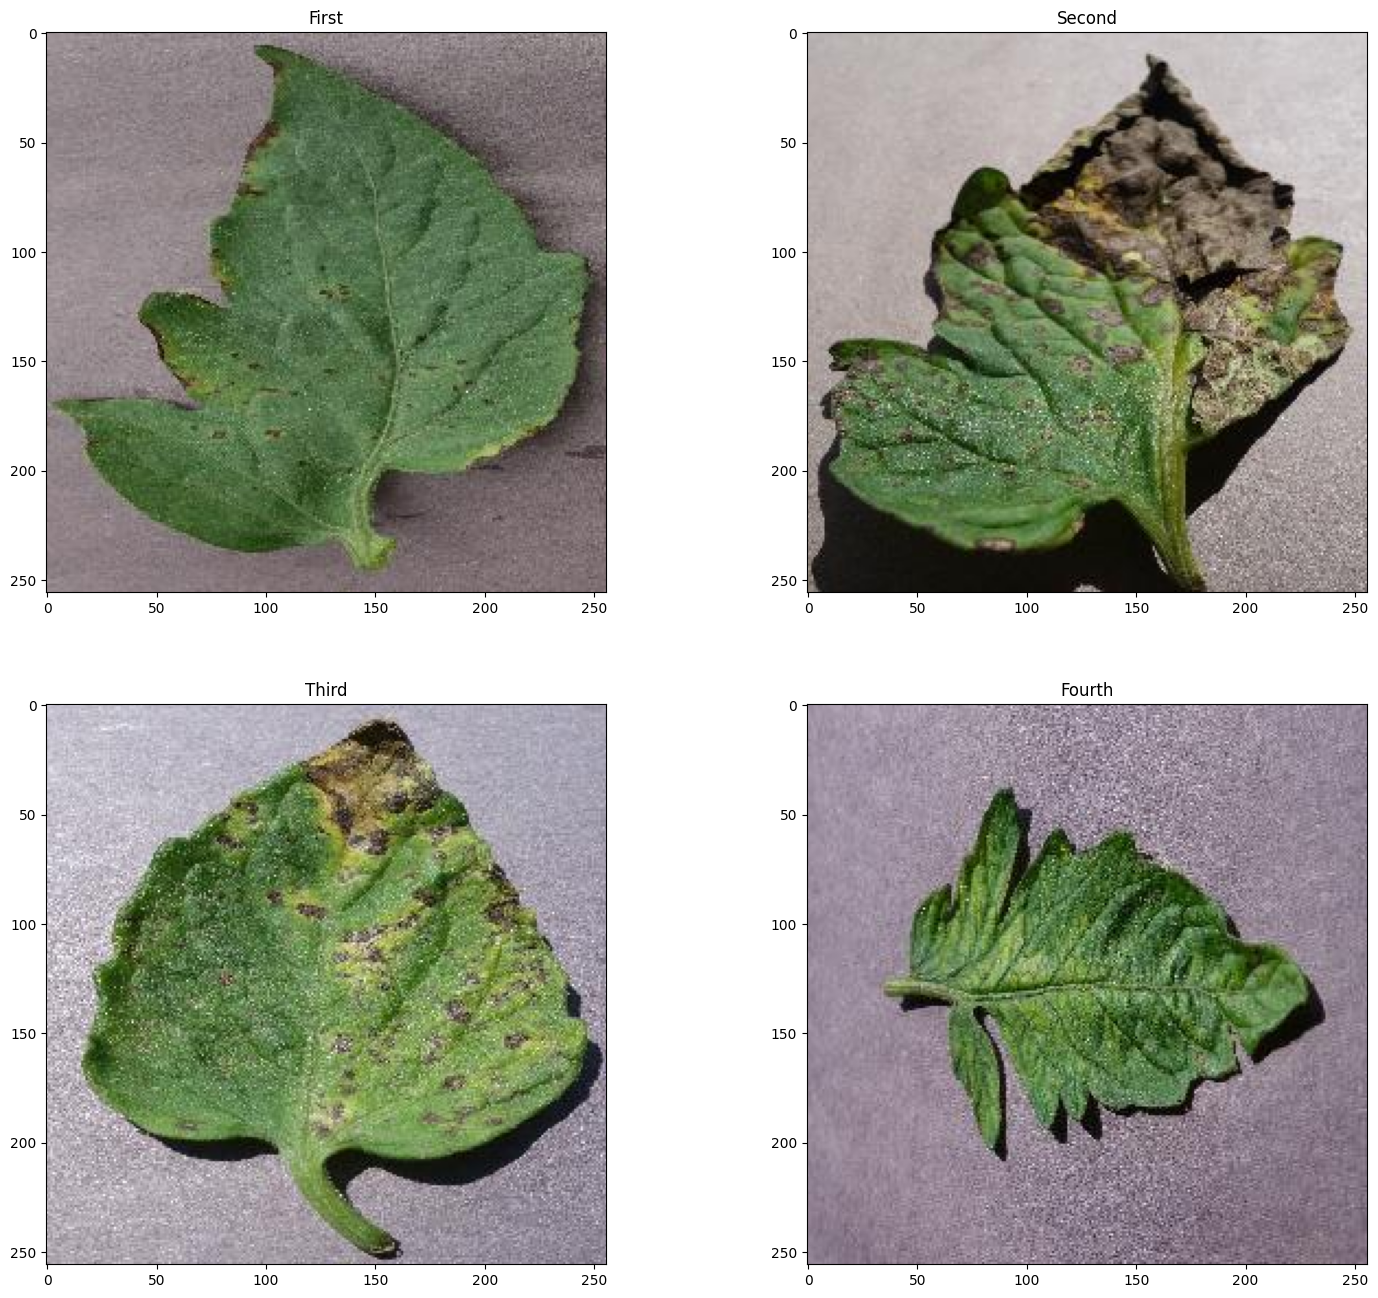

In [9]:
from tensorflow.keras.preprocessing import image
fig = plt.figure(figsize=(18, 16))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = image.load_img(folder_path1 + '/Tomato___Bacterial_spot/0.JPG')
Image2 = image.load_img(folder_path1 + '/Tomato___Early_blight/101.JPG')
Image3 = image.load_img(folder_path1 + '/Tomato___Septoria_leaf_spot/108.JPG')
Image4 = image.load_img(folder_path1 + '/Tomato___Tomato_mosaic_virus/142.JPG')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

In [10]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [11]:
train_generator=train_datagen.flow_from_directory(
    folder_path1,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path2,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)


Found 8000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [12]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0 

In [13]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
x = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    verbose=1,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator,)
                    )

Epoch 1/20


<ipython-input-14-0618c422f44c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  x = model.fit_generator(train_generator,


250/250 [==============================] - 28s 52ms/step - loss: 1.4923 - accuracy: 0.5189 - val_loss: 0.9023 - val_accuracy: 0.7550
Epoch 2/20
250/250 [==============================] - 16s 63ms/step - loss: 0.7980 - accuracy: 0.7690 - val_loss: 0.6146 - val_accuracy: 0.8300
Epoch 3/20
250/250 [==============================] - 12s 47ms/step - loss: 0.5251 - accuracy: 0.8546 - val_loss: 0.4985 - val_accuracy: 0.8450
Epoch 4/20
250/250 [==============================] - 12s 49ms/step - loss: 0.3737 - accuracy: 0.8981 - val_loss: 0.4461 - val_accuracy: 0.8600
Epoch 5/20
250/250 [==============================] - 11s 45ms/step - loss: 0.2774 - accuracy: 0.9245 - val_loss: 0.3887 - val_accuracy: 0.8550
Epoch 6/20
250/250 [==============================] - 11s 46ms/step - loss: 0.1920 - accuracy: 0.9488 - val_loss: 0.3432 - val_accuracy: 0.8900
Epoch 7/20
250/250 [==============================] - 12s 49ms/step - loss: 0.1372 - accuracy: 0.9695 - val_loss: 0.3525 - val_accuracy: 0.9100
Epo

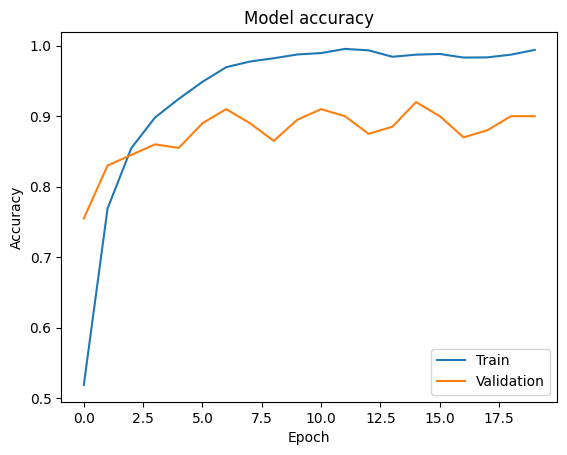

In [15]:
import matplotlib.pyplot as plt
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

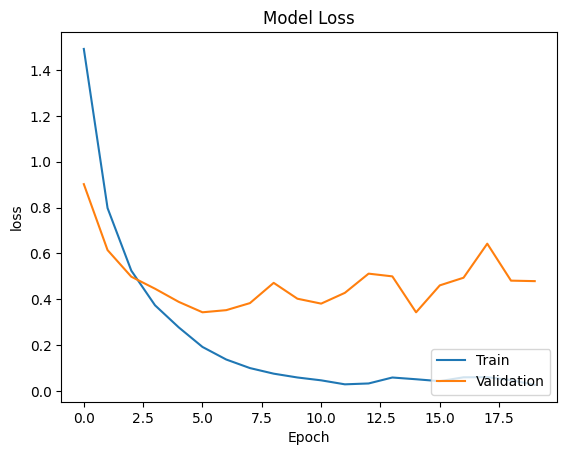

In [16]:
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [17]:
model.save('tomato_leaf_resnet_50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
